# Statistics and Hypothesis Testing Examples

This notebook contains several examples of data analysis that benefit from statistical tests.

1. Scatterplot the relationship between alcohol and Residual Sugar
2. Filter outliers using `quantile`
3. Draftsns correlation matrix heatmap
   1. Do the same but with pairplot
   2. Calculate the pearson relationship between any interesting relationships
      1. Plan null and alternate hypothesis
      2. Provide conclusions (2)
      3. Try also one without that much relationship
   3. scatterplot the dots
      1. Draw the same in sns but now with regression line inlcuded .regplot


**Temperature**

1. plot where year less than 2021, group by year and show `regplot`.
2. Find the linear regression of `tmax` and `year`


**Correlate in linear**

1. Filter rows
2. heatmap correlations
3. pairpot with hue on species
4. Regression plot the differences
5. lmplot (linear regressins on each species)

**wine_df_red** (T Test)

1. Run ttest within two populations `citric acid`
2. Interpret results

```
stats.ttest_ind
```


**Determining if the distribution of a categorical variable is unusual**

1. dropna
2. Show only columns: ['survived', 'pclass', 'sex']
3. Show information and describe
4. Perform countplot sex and survival
5. Plot a crosstab between sex and survived
6. Perform the chi test on
   1. sex difference
   2. Explain what is the expected value

Starter Code

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

# For brevity, we will focus on a subset of the wine dataset.
wine_df = df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/wine_quality/winequality-white.csv", delimiter=";")
wine_df = wine_df[['citric acid', 'residual sugar', 'density', 'sulphates', 'alcohol']]

In [ ]:
# Load NYC temperature data. For this analysis, we will look at the maximum
# daily temperature. In this dataset, temperature is recorded as 10ths of a degree
# celsius, so we divide by 10 to make it more readable. Additionally, we exclude
# 2021 since the temperature data is incomplete.

temp_df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/nyc_temp_1869_2021.csv", index_col=0)
temp_df['TMAX'] = temp_df['TMAX'] / 10
temp_df = temp_df[temp_df['YEAR'] < 2021]

In [ ]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/iris/iris_train.csv")

iris_df

In [40]:
wine_df_white = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/wine_quality/winequality-white.csv", delimiter=";")
wine_df_red = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/wine_quality/winequality-red.csv", delimiter=";")

print("Red:", wine_df_red['citric acid'].mean())
print("White:", wine_df_white['citric acid'].mean())

Red: 0.2709756097560976
White: 0.33419150673744386


In [41]:
# As an example, let's look at the Titanic dataset. This dataset contains information
# about passengers on board the Titanic, including whether they survived.
#
# For this analysis, we'll look at the following columns:
#
#   - survived: 1 if survived, 0 if not
#   - pclass: The class of accommodations booked by the passenger (1, 2, 3)
#   - sex: "male" or "female"
titanic_df = sns.load_dataset('titanic')
titanic_df = titanic_df[['survived', 'pclass', 'sex']].dropna()
titanic_df.head()

,survived,pclass,sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


## Example 1: Wine Correlations

This analysis examines the wine dataset, which describes a variety of wines in terms of chemical composition, physical properties, and rating. In a previous exploratory analysis, we found that some properties of wine are related to others. Here, we will re-do this analysis with statistical tests.

In [2]:
# For brevity, we will focus on a subset of the wine dataset.
wine_df = df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/wine_quality/winequality-white.csv", delimiter=";")
wine_df = wine_df[['citric acid', 'residual sugar', 'density', 'sulphates', 'alcohol']]

<Axes: xlabel='residual sugar', ylabel='alcohol'>

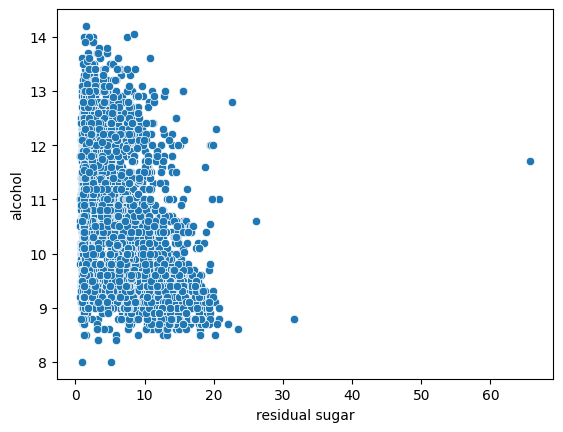

In [3]:
# There are a few extreme outliers in residual sugar that make the graphics
# difficult to read. We can see this in the following visualization:
sns.scatterplot(wine_df, x='residual sugar', y='alcohol')

In [4]:
# To fix this, we'll remove all values of residual sugar that are greater
# than 99% of the other values:
wine_df = wine_df[wine_df['residual sugar'] < wine_df['residual sugar'].quantile(.99)]

<Axes: >

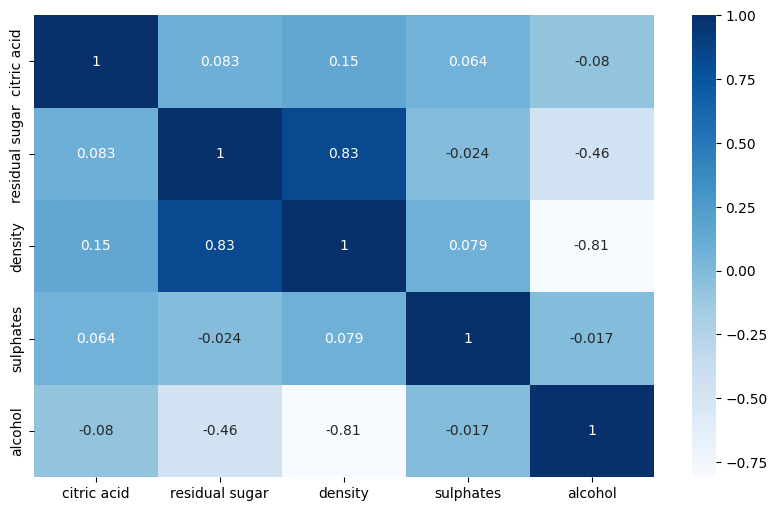

In [5]:
# A good first step is to make a correlation matrix. It will show us if there are
# linear relationships between some properties of the wine:
#
#   - Residual sugar is strongly correlated with density. This makes sense: sugar
#     is dense, so a wine with more sugar has a higher density than wine with less
#     sugar
#   - Residual sugar is moderately negatively correlated with alcohol. Again, this
#     makes sense: yeast consume sugar to produce alcohol.
#   - Sulphates has an almost nonexistent negative correlation with alcohol.
plt.figure(figsize=(10, 6))
sns.heatmap(wine_df.corr(), cmap="Blues", annot=True)

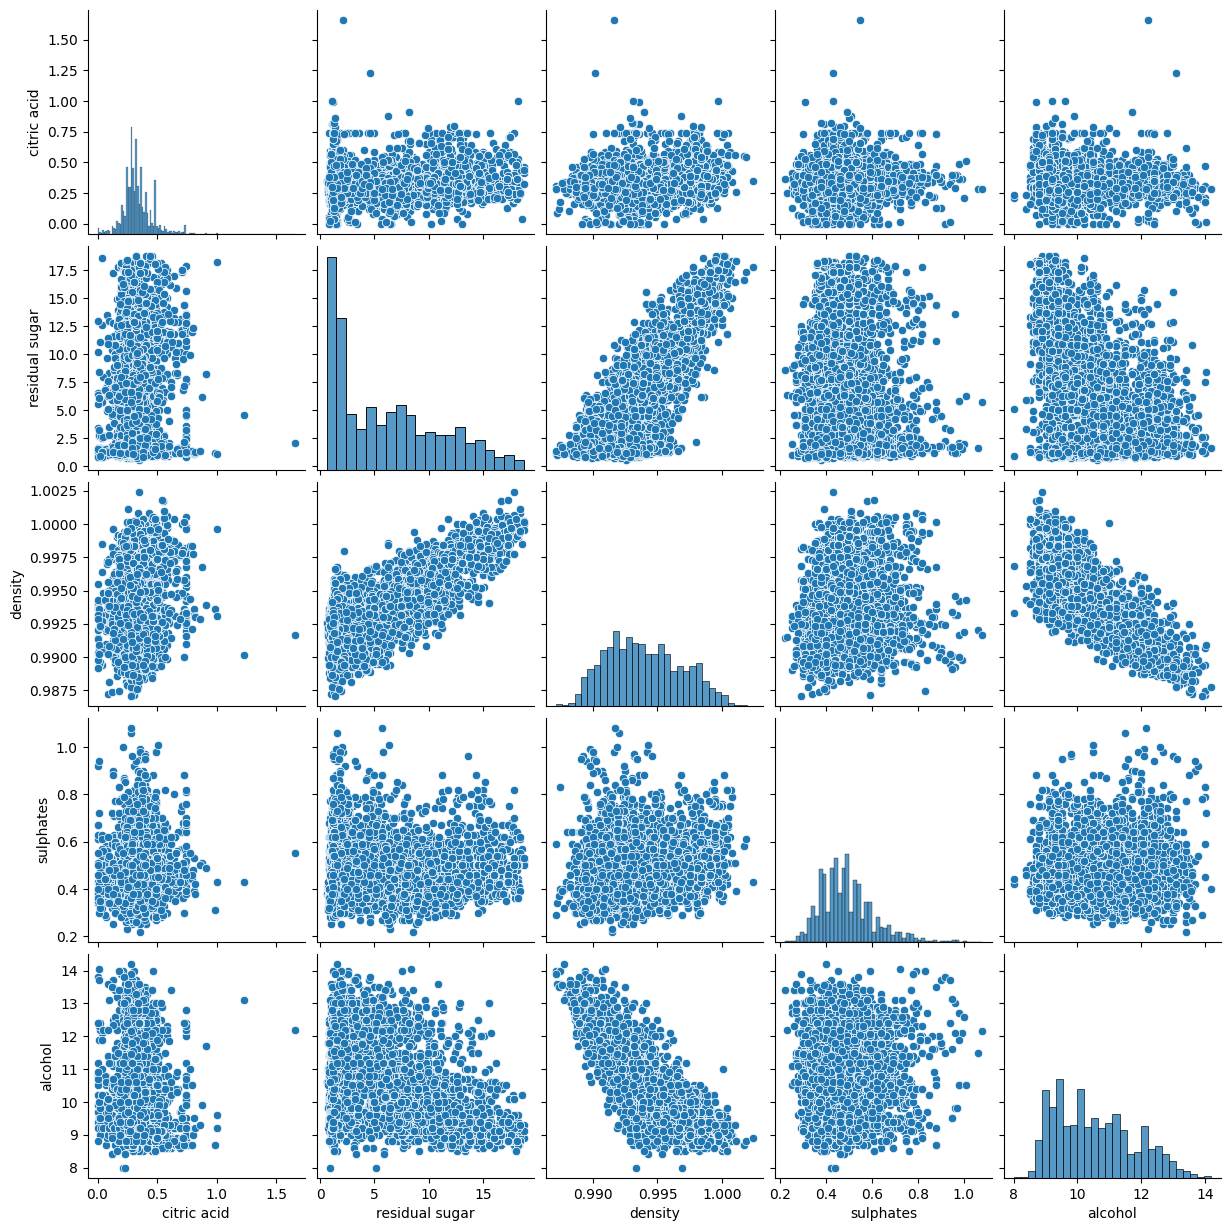

In [6]:
# What do these relationships actually look like? We can use a Seaborn pair plot
# to visualize them. We should be able to see the correlations in the visualizations
# below: For example, we can see how density increases with residual sugar, and
# how alcohol tends to decrease with greater residual sugar. Additionally, it is
# hard to see any relationship between sulphates and alcohol.
sns.pairplot(wine_df)

In [7]:
# The correlation matrix is assembled from a statistic called Pearson's R,
# and we can perform statistical tests to Scipy to determine whether there actually
# is an effect.
#
# Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
# Null hypothesis: There is no correlation between the given variables.
# Alternative hypothesis: The correlation between the given variables is nonzero.
#
# Testing density and residual sugar, we see the p value is either 0 or so small
# that Python rounded to 0. In a report or paper, we might say something like:
#
#   "Among white wines, residual sugar and density are strongly positively
#    correlated (r=0.83, p≈0)"
stats.pearsonr(wine_df['residual sugar'], wine_df['density'])

PearsonRResult(statistic=0.8263521809729764, pvalue=0.0)

In [8]:
# Similarly, for residual sugar and alcohol, we see the moderate negative linear
# correlation is significant. We might describe it similarly:
#
#   "Among white wines, residual sugar and alcohol content are moderately negatively
#    correlated (r=-0.46, p≈0)"
#
# Alternatively, we might choose to not mention the specific p value, and only
# confirm that it is less than our chosen confidence level:
#
#   "Among white wines, residual sugar and alcohol content are moderately negatively
#    correlated (r=-0.46, p < 0.01)"
#
# (however, in this case, the p value is so low, it is worth mentioning it)
stats.pearsonr(wine_df['residual sugar'], wine_df['alcohol'])

PearsonRResult(statistic=-0.46158799458065725, pvalue=1.8052598196914168e-254)

In [9]:
# However, for sulphates and alcohol, we see a different result: the p value is
# very large. Because of this, we can disregard the correlation statistic.
# In a paper or report, we might describe it as:
#
#   "In white wines, there is no statistically significant correlation between
#    sulphate and alcohol content."
stats.pearsonr(wine_df['sulphates'], wine_df['alcohol'])

PearsonRResult(statistic=-0.017271837134857262, pvalue=0.22921795934412806)

In [10]:
# Pearson r
# Null hypothesis: The underlying samples are uncorrelated
# P value: The probability of an uncorrelated system producing datasets that
#          have a Pearson correlation at least as extreme as the one computed
#          from the datasets
#
# Residual sugar, density:
#     Strong correlation, very low p, there is almost certainly a correlation between these variables below significance 1%
# Residual sugar, alcohol:
#     Weak negative correlation but very low p. So there is almost certainly a correlation between these variables below significance 1%,
#     but we have to acknowledge that the correlation is not strong.
# Sulphates, alcohol:
#     Almost no correlation at all, very high p. Because p is so high, we fail to reject the null hypothesis,
#     so we can confidently say there is no relationship between sulphates and alcohol.
#
# Note: It is uncommon to see extremely weak (near 0) linear relationships with low p-values, and it is uncommon to see very high
# (+1, -1) linear relationships with high p values
stats.pearsonr(wine_df['sulphates'], wine_df['citric acid'])

PearsonRResult(statistic=0.06371022635305866, pvalue=9.022876452448106e-06)

<Axes: xlabel='residual sugar', ylabel='density'>

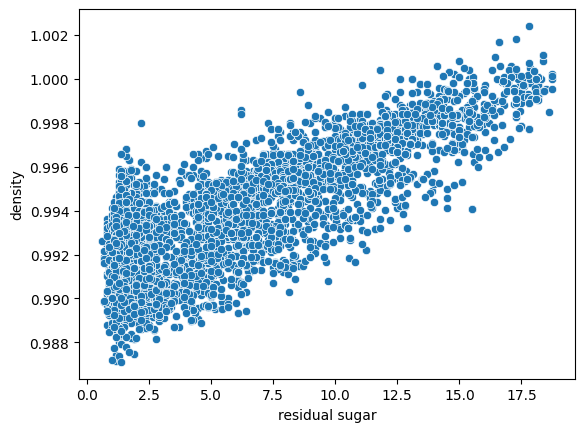

In [11]:
# For variables that are correlated, what is the nature of their relationship?
# Pearson's test tells us whether a correlation exists, but what does it actually
# look like?
#
# To put it another way, imagine drawing a line through the scatter plot below,
# with the intent of having the line approximate the linear relationship between
# the two variables.
sns.scatterplot(wine_df, x='residual sugar', y='density')

<Axes: xlabel='residual sugar', ylabel='density'>

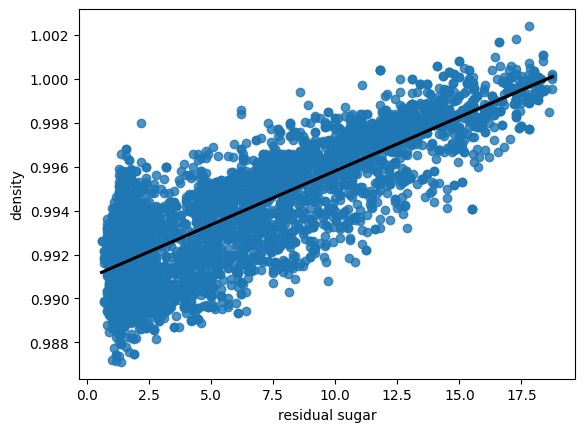

In [12]:
# Drawing this line is called a linear regression, and Seaborn can do it for us.
#
# Note: The line_kws argument is only necessary for this graph, since the points
# are so dense that we cannot see the regression line (it is colored the same as
# the points by default). Here, we are overriding its default color and asking
# Seaborn to color it black.
#
# The linear regression is useful for three reasons:
#
#   1. It makes the linear relationship between the two variables both explicit
#      and easy to visualize.
#   2. It raises the possibility of predicting density from residual sugar. If
#      we encounter a new wine with 10 units of residual sugar, we can use the
#      line to predict that it will have a density of approximately 0.995.
#   3. It gives us some rough idea of how much density changes with residual sugar.

sns.regplot(wine_df, x='residual sugar', y='density', line_kws={'color': 'black'})

In [13]:
# Visualizing the linear regression is very useful, but it doesn't tell us the
# whole story. If we are interested in points 2 and 3 above (i.e., we want to
# predict density for new wines, or we want to quantify how much density increases
# with sugar), the visualization is insufficient.
#
# We can get more information with a linear regression with Scipy. Note the
# rvalue and pvalue are a Pearson R test, so the linregress() function gets
# you a linear regression and a Pearson test at once.
#
# Looking at the slope, we see that density increases by about 0.0005 per unit
# of residual sugar.
linregress_results = stats.linregress(wine_df['residual sugar'], wine_df['density'])
linregress_results

LinregressResult(slope=0.0004911402511396518, intercept=0.9908934303496673, rvalue=0.8263521809729774, pvalue=0.0, stderr=4.808123073015798e-06, intercept_stderr=3.785753172101065e-05)

In [14]:
# Linear regression: Descriptive
# Null hypothesis: The slope of the regression is zero
# Alternative hypothesis: The slope of the regression is nonzero
stats.linregress(wine_df['sulphates'], wine_df['citric acid'])

LinregressResult(slope=0.0667825638439396, intercept=0.30086206388236225, rvalue=0.06371022635305856, pvalue=9.02287645244835e-06, stderr=0.015027233760729931, intercept_stderr=0.00756319568235474)

## Example 2: NYC Temperature Trends

Linear regressions are especially useful with time-series data. In a prior analysis, we determined the average temperature in NYC has increased since 1869. A linear regression can help us visualize how it is changing, and tell us an approximate rate of change.

In [15]:
# Load NYC temperature data. For this analysis, we will look at the maximum
# daily temperature. In this dataset, temperature is recorded as 10ths of a degree
# celsius, so we divide by 10 to make it more readable. Additionally, we exclude
# 2021 since the temperature data is incomplete.

temp_df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/nyc_temp_1869_2021.csv", index_col=0)
temp_df['TMAX'] = temp_df['TMAX'] / 10
temp_df = temp_df[temp_df['YEAR'] < 2021]

In [16]:
# Use aggregation to find the average yearly temperature.
yearly_temp_df = temp_df[temp_df.YEAR < 2021].groupby('YEAR')["TMAX"].mean().reset_index()
yearly_temp_df

,YEAR,TMAX
0,1869,13.976257
1,1870,15.763288
2,1871,14.975342
3,1872,14.940984
4,1873,14.555890
...,...,...
147,2016,18.128415
148,2017,17.366301
149,2018,17.027397
150,2019,17.033973


<Axes: xlabel='YEAR', ylabel='TMAX'>

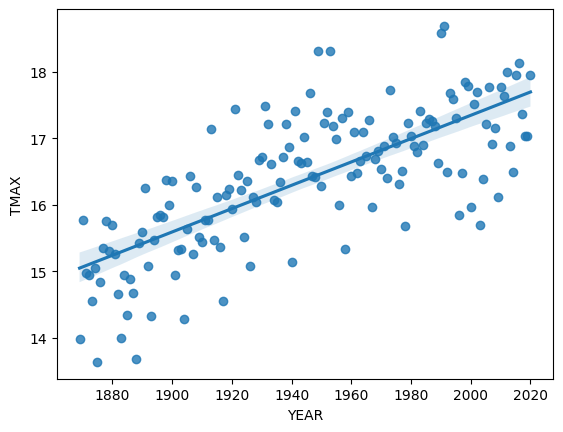

In [17]:
# First, we can use the Seaborn regression plot to visualize the temperature increase:
sns.regplot(yearly_temp_df, x='YEAR', y='TMAX')

In [18]:
# Second, we can use the Scipy linregress() function to determine the slope
# of the line.
#
# In a report, we might say something like this:
#
#   "In NYC, the average yearly temperature, computed as the maximum daily
#    temperature averaged by year, has been increasing since 1969
#    (r=0.74, p < 0.01). It increases by approximately 0.02 degrees Celsius each year."
stats.linregress(yearly_temp_df['YEAR'], yearly_temp_df['TMAX'])

LinregressResult(slope=0.01752817086579442, intercept=-17.712891044051073, rvalue=0.7398503298717318, pvalue=1.3238314398444968e-27, stderr=0.0013014116240677822, intercept_stderr=2.531239085017653)

## Example 3: Multiple regressions in the Iris dataset

We can use regression to help us understand the relationship between different properties of iris flowers. However, a single linear regression is often insufficient. The iris dataset consists of three separate species of iris. We'll see how multiple linear regressions can help us understand how iris species are different.

In [19]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/iris/iris_train.csv")

In [20]:
# First, we'll look at a correlation matrix and pair plot. We can see that some
# measurements are more highly correlated than others. For example, petal width
# and petal length are correlated, but sepal width and sepal length are
# barely correlated:
plt.figure(figsize=(10, 6))
sns.heatmap(iris_df.corr(), cmap="Blues", annot=True)

ValueError: could not convert string to float: 'Iris-virginica'

<Figure size 1000x600 with 0 Axes>

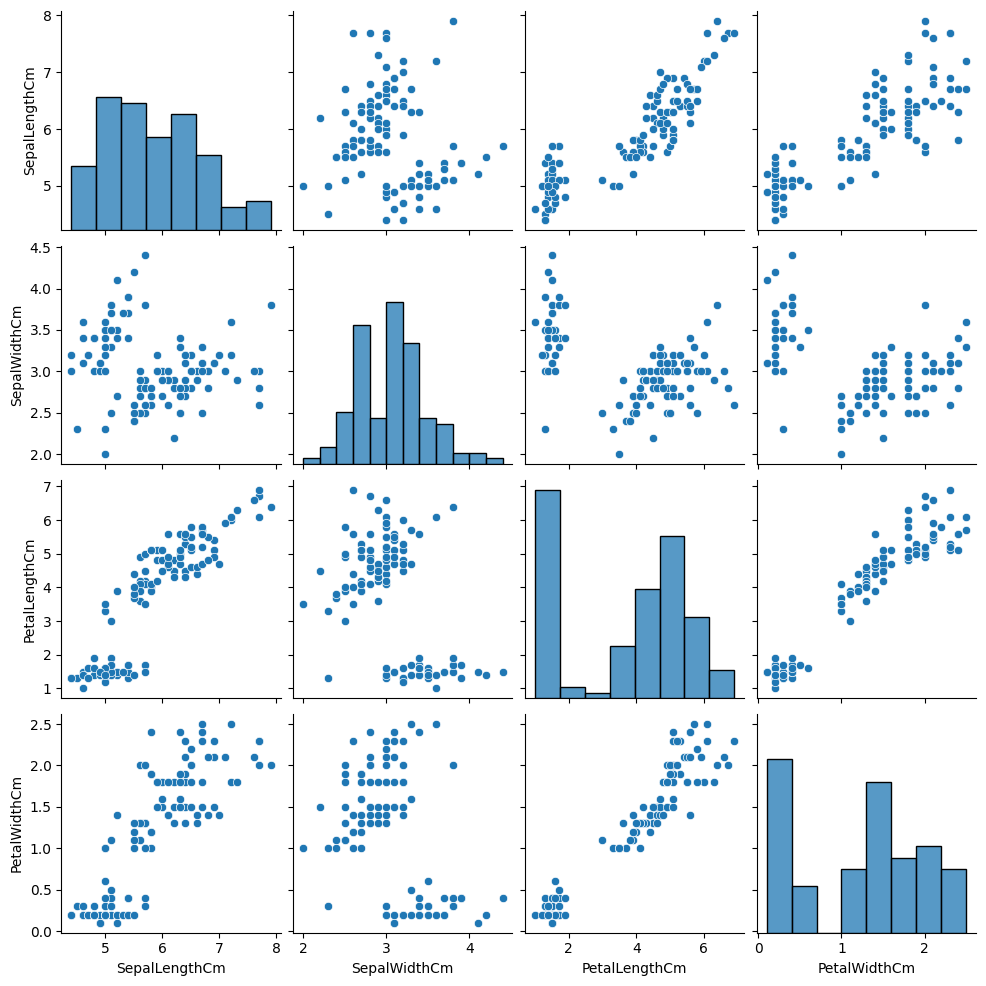

In [ ]:
# We can see about as much when we visualize the data. In general, long iris petals
# are also wide, and narrow iris petals are also short. But what kind of correlation
# do we have for sepal width/length?
sns.pairplot(iris_df)

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

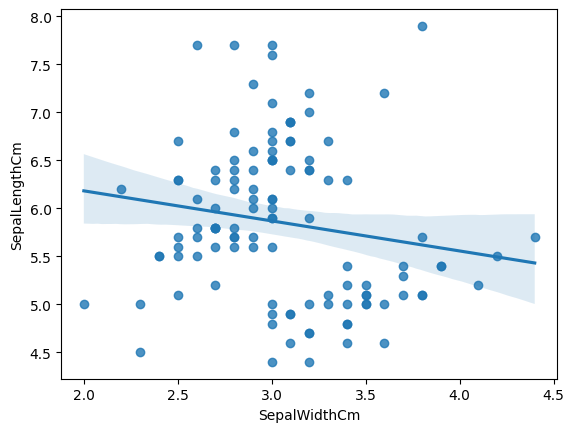

In [ ]:
# This is the best we can get from a linear regression. According to the regression,
# among all irises, sepal length decreases slightly as sepal width increases.
sns.regplot(iris_df, x='SepalWidthCm', y='SepalLengthCm')

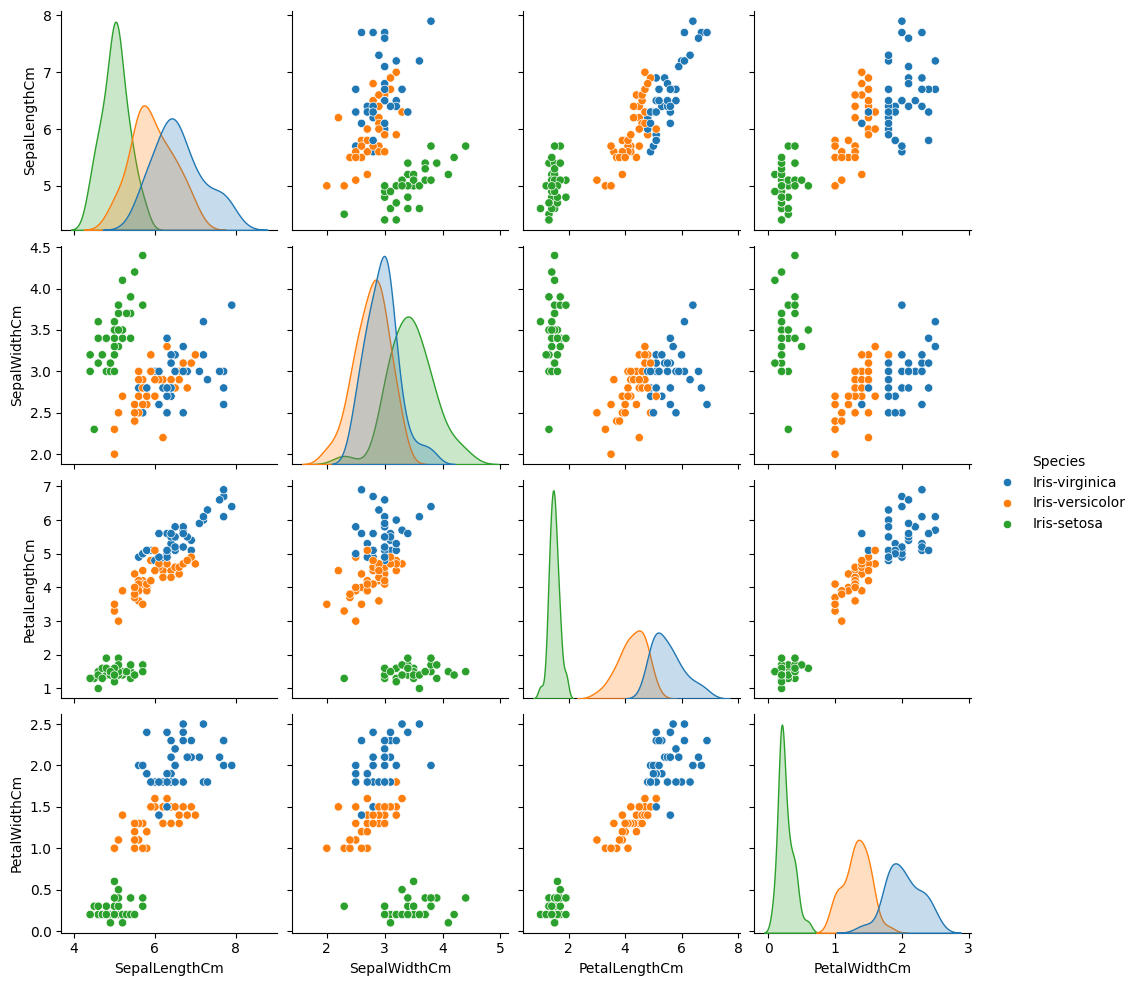

In [21]:
# But is this actually the best way to look at the data? No. The dataset contains
# three different species of iris. If we segment the pair plot by species, we can
# see that it might be a mistake to consider sepal width/length together for all
# three species.
sns.pairplot(iris_df, hue='Species')

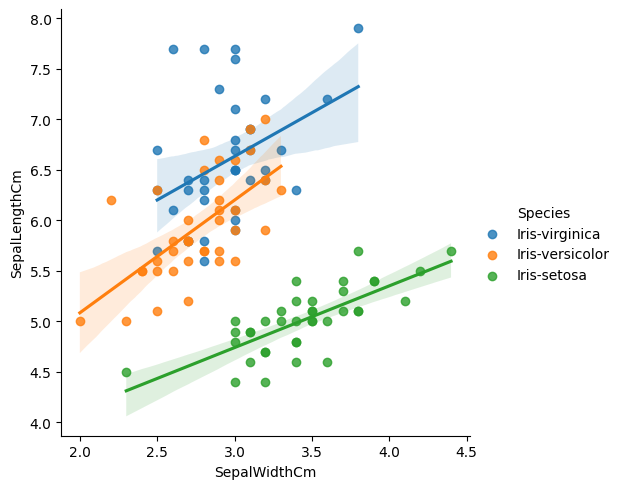

In [22]:
# What we want to do is perform three separate linear regressions, one for each
# species. We can do this with a different type of regression plot, lmplot.
#
# Here we see that setosa, versicolor, and virginica all have different
# relationships between sepal length and width! The previous regression attempting
# to capture all three species at once went in the completely wrong direction!
#
# If you have any categorical variables in your analysis that can reasonably group
# your data, it is worth considering whether you should perform multiple regressions
# for each group.
sns.lmplot(iris_df, x='SepalWidthCm', y='SepalLengthCm', hue='Species')

## Example 4: Determining if two variables have different means with the T-test

Sometimes, we may encounter two variables we want to compare - say, is one value larger or smaller than the other on average? In the past, we answered that question with Pandas aggregations. But what about situations where it's ambiguous?

We can use a T-test to determine if any two variables are really different or not.

In [23]:
# Load both the red and white wine datasets.
# For this analysis, let's find out how different red and white wines really are.
# In particular, we can come into this with a hypothesis: white wine is often more
# tart and acidic than red wine, so we might guess that various measurements
# related to acidity will be higher for white wines than red.
wine_df_white = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/wine_quality/winequality-white.csv", delimiter=";")
wine_df_red = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/wine_quality/winequality-red.csv", delimiter=";")


In [24]:
# Citric acid might be a good place to look. Let's find out if white wine
# has more citric acid than red wine. It looks like it does, on average.
print("Red:", wine_df_red['citric acid'].mean())
print("White:", wine_df_white['citric acid'].mean())

Red: 0.2709756097560976
White: 0.33419150673744386


In [25]:
# We can back up our assertion with a statistical test. In this case, we can
# perform a t-test:
#
# Null hypothesis: The means of the two groups is the same.
# Alternative hypothesis: The means of the two groups are different
#
# Because the p-value is so low, we reject the null hypothesis.
# The statistic gives us a sense of the magnitude of the difference. We will
# look at differences in alcohol later: its statistic will be much lower. So in
# this case, we can conclude that there is a pretty big difference between the
# mean citric acid for red and white wine, and it is significant.
#
# In a paper, you might write the following:
#
#   "Red wines have a mean citric acid content of 0.27, and white wines have a mean
#    citric acid of 0.33. The difference is statistically significant at p<0.01.""
stats.ttest_ind(wine_df_red['citric acid'], wine_df_white['citric acid'])

TtestResult(statistic=-15.374954114170604, pvalue=2.0037357017957886e-52, df=6495.0)

In [26]:
# T-tests are particularly useful in situations like this, where the difference
# between the two variable means is very small. In this case, both red and white
# wines have a mean alcohol content of about 10.5ish (10.42 for red, 10.51 for white).
# Without a statistical test, we might not be sure what to make of this difference.

print("Red:", wine_df_red['alcohol'].mean())
print("White:", wine_df_white['alcohol'].mean())

Red: 10.422983114446529
White: 10.514267047774602


In [27]:
# The t-test shows that the difference, though small, is significant.
stats.ttest_ind(wine_df_red['alcohol'], wine_df_white['alcohol'])

TtestResult(statistic=-2.6585128987466375, pvalue=0.007867873993342453, df=6495.0)

## Example 5: Determining if the distribution of a categorical variable is unusual

None of the statistical tests we looked at are specifically designed to work with categorical variables, although you might be able to use them in some situations (for example, binary variables represented as 0 and 1).

None of them can help us with the following situation: let's say we have a categorical variable we can use to divide our data. Is the distribution of data points among the variable unusual?

In [28]:
# As an example, let's look at the Titanic dataset. This dataset contains information
# about passengers on board the Titanic, including whether they survived.
#
# For this analysis, we'll look at the following columns:
#
#   - survived: 1 if survived, 0 if not
#   - pclass: The class of accommodations booked by the passenger (1, 2, 3)
#   - sex: "male" or "female"
titanic_df = sns.load_dataset('titanic')
titanic_df = titanic_df[['survived', 'pclass', 'sex']].dropna()
titanic_df.head()

,survived,pclass,sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [29]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  891 non-null    int64 
 1   pclass    891 non-null    int64 
 2   sex       891 non-null    object
dtypes: int64(2), object(1)
memory usage: 21.0+ KB


<Axes: xlabel='sex', ylabel='count'>

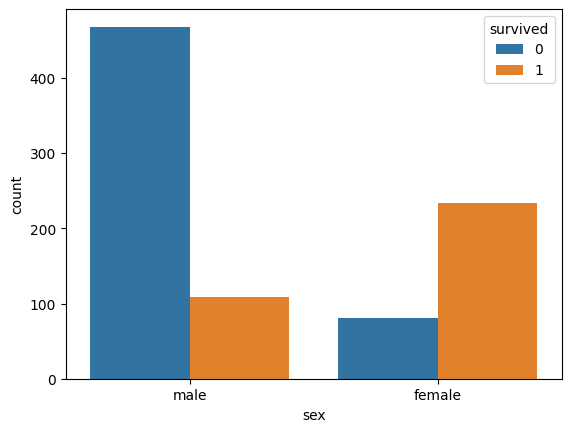

In [30]:
# From historical records, we know that more female passengers survived than
# male passengers. We can see as much if we plot it:
sns.countplot(titanic_df, x='sex', hue='survived')

In [31]:
# This is pretty obviously skewed towards male passengers not making it
# off the boat. Let's try a statistical test: the chi-squred (X2) test.
#
# To use it, we need a contingency table. Here's how we make one. Note that
# the table counts the number of passengers in each category:
sex_contingency = pd.crosstab(titanic_df['sex'], titanic_df['survived'])
sex_contingency

survived,0,1
sex,,
female,81,233
male,468,109


In [32]:
# With the contingency table, we can perform a chi-squared test.
#
# Null hypothesis: There is no relationship between the categorical variables.
# Alternative hypothesis: There is a relationship between the categorical variables.
#
# From the p value, we can reject the null hypothesis. From the statistic, which
# is quite large, we can say that there is a very strong relationship between
# surviving the Titanic and passenger sex. But what is the expected_freq value?
results = stats.chi2_contingency(sex_contingency)
results

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

<Axes: xlabel='survived', ylabel='sex'>

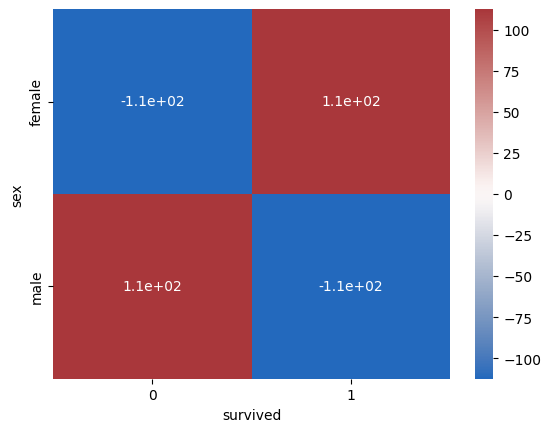

In [33]:
# The expected_freq value shows us an expected distribution of values in the
# contingency table if there was no relationship between the categorical variables.
# We can use it to make a visualization that shows how surprised we should be by
# the different situations (or, more specifically, how many more or less passengers
# there are in each category than we would expect if there was no effect).
#
# In particular, we see that many more female passengers survived and many more
# male passengers did not survive than we would have expected if the variables
# had no relationship. Similarly, many fewer female passengers did not survive
# and many fewer male passengers survived than we would have expected.
sns.heatmap(
    sex_contingency - results.expected_freq,
    cmap='vlag',
    annot=True
)

<Axes: xlabel='pclass', ylabel='count'>

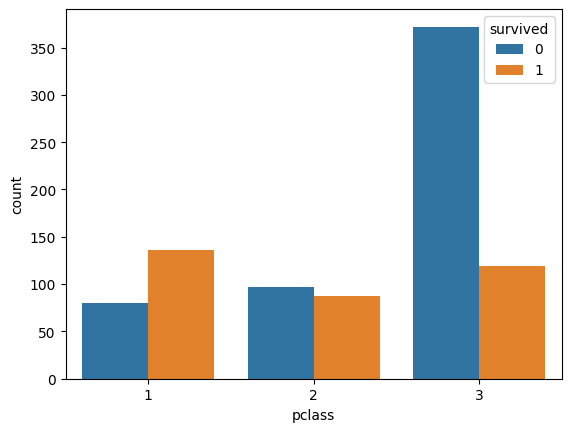

In [34]:
# Let's try it again with passenger class:
sns.countplot(titanic_df, x='pclass', hue='survived')

In [35]:
class_contingency = pd.crosstab(titanic_df['pclass'], titanic_df['survived'])
class_contingency

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [36]:
results = stats.chi2_contingency(class_contingency)
results

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

In [37]:
pd.crosstab(
    titanic_df.loc[titanic_df['sex'] == 'female', 'pclass'],
    titanic_df.loc[titanic_df['sex'] == 'female', 'survived']
)

survived,0,1
pclass,,
1,3,91
2,6,70
3,72,72


In [38]:
results = stats.chi2_contingency(
    pd.crosstab(titanic_df['pclass'], titanic_df['survived'])
)
results

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

<Axes: xlabel='survived', ylabel='pclass'>

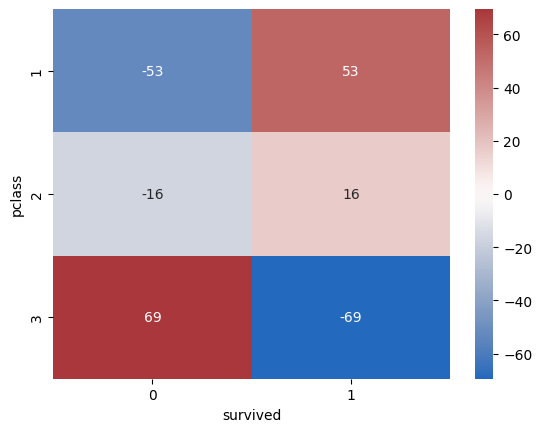

In [39]:
# From the test above, we see that passenger class and survival has a relationship,
# and the effect is significant. From the chart below, we can make the following
# observations:
#
# If there was no relationship between class and survival:
#   - Fewer first-class passengers died than expected
#   - It looks like the effect is weakest with second-class passengers. Only 16
#     more died than expected.
#   - More 3rd class passengers died than expected
sns.heatmap(
    class_contingency - results.expected_freq,
    cmap='vlag',
    annot=True
)